In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# I) Clustering - Expectation Maximization

In [2]:
# Data
X = np.array([[2, 0], [1, 0], [0, 1]])

# Number of clusters
K = 2

# Means
mi = np.array([[1, 0], [0, 1]])

# Covariances
cov = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]]])

# Prior probability
pi = [0.5, 0.5]

# Epochs
epochs = 2

###########################################################

for epoch in range(0, epochs):
    print('------------------------------------------')
    print(f'\t\t {epoch+1}° Epoch')

    # E-STEP
    print('---------------- E-Step ------------------')
    list_likelihood = []
    list_joint_prob = []
    list_norm_posterior = []

    for i in range(0, len(X)): # Para cada exemplo
        print(f'For point {i}:')

        list_likelihood_i = []
        list_joint_prob_i = []
        list_norm_posterior_i = []

        for k in range(0, K): # Para cada cluster
            likelihood = multivariate_normal.pdf(X[i], mean = mi[k], cov = cov[k], allow_singular=True) # sci.norm(df.mean()[i], df.std(ddof=0)[i]).pdf(x[i])

            print(f'For C = {k}:')

            print(f"\t Likelihood: {'{:.4e}'.format(likelihood)}")
            list_likelihood_i.append(likelihood)

            joint_prob = likelihood * pi[k]
            print(f"\t Joint Probability: {'{:.4e}'.format(joint_prob)}\n")
            list_joint_prob_i.append(joint_prob)

        list_likelihood.append(list_likelihood_i)
        list_joint_prob.append(list_joint_prob_i)


        for k in range(0, K):
            norm_posterior = list_joint_prob[i][k] / np.sum(list_joint_prob[i])
            print(f"Normalized Posterior for C = {k}: {'{:.4e}'.format(norm_posterior)}")

            list_norm_posterior_i.append(norm_posterior)
        list_norm_posterior.append(list_norm_posterior_i)
        print('------------------------------------------')

    # M-STEP
    print('\n')
    print('---------------- M-Step -------------')

    # New means
    mi = [np.average(X, weights=np.array(list_norm_posterior).T[k], axis=0) for k in range(0, K)]
    print(f'New means are: {mi}')

    # New covariances
    cov = [np.cov(X, rowvar =False, bias=True, aweights=np.array(list_norm_posterior).T[k]) for k in range(0, K)]
    print(f'New cov are: {cov}')

    # New likelihoods
    list_likelihood = []

    for i in range(0, len(X)): # Para cada exemplo
        print(f'For point {i}:')

        list_likelihood_i = []

        for k in range(0, K): # Para cada cluster
            likelihood = multivariate_normal.pdf(X[i], mean = mi[k], cov = cov[k], allow_singular=True)

            print(f'For C = {k}:')

            print(f"\t Likelihood: {'{:.4e}'.format(likelihood)}")
            list_likelihood_i.append(likelihood)

        list_likelihood.append(list_likelihood_i)

    # New Priors
    pi = np.sum(list_norm_posterior, axis=0) / np.sum(np.sum(list_norm_posterior))
    print(f'New Prior is: {pi}')

------------------------------------------
		 1° Epoch
---------------- E-Step ------------------
For point 0:
For C = 0:
	 Likelihood: 9.6532e-02
	 Joint Probability: 4.8266e-02

For C = 1:
	 Likelihood: 1.3064e-02
	 Joint Probability: 6.5321e-03

Normalized Posterior for C = 0: 8.8080e-01
Normalized Posterior for C = 1: 1.1920e-01
------------------------------------------
For point 1:
For C = 0:
	 Likelihood: 1.5915e-01
	 Joint Probability: 7.9577e-02

For C = 1:
	 Likelihood: 5.8550e-02
	 Joint Probability: 2.9275e-02

Normalized Posterior for C = 0: 7.3106e-01
Normalized Posterior for C = 1: 2.6894e-01
------------------------------------------
For point 2:
For C = 0:
	 Likelihood: 5.8550e-02
	 Joint Probability: 2.9275e-02

For C = 1:
	 Likelihood: 1.5915e-01
	 Joint Probability: 7.9577e-02

Normalized Posterior for C = 0: 2.6894e-01
Normalized Posterior for C = 1: 7.3106e-01
------------------------------------------


---------------- M-Step -------------
New means are: [array(

## RBF netwoork with Kmeans

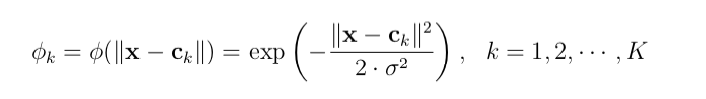

In [111]:
# Data
X = np.array([[1, 0, 0], [3, 0, 0], [0, 0, 1]])
t = np.array([1, 1, -1])

In [112]:
# Cluster centers initialized
C = np.array([[1, 0, 0], [0, 0, 1.1]])
sigma = 1

ValueError: 'c' argument has 4 elements, which is inconsistent with 'x' and 'y' with size 2.

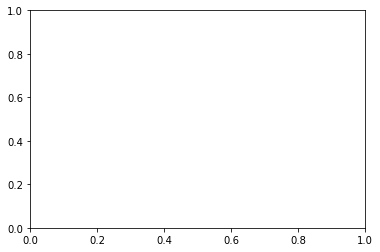

In [113]:
# First we look determine the cluster centers of k-Means by drawing the values in 2 dim coordinate system
plt.scatter(C.T[0], C.T[1], color=['g', 'b', 'r', 'black'], marker = 'o', s=80)
plt.scatter(X.T[0][4], X.T[1][4], color='black', marker = 'o', s=80)
plt.scatter(X.T[0][5], X.T[1][5], color='g', marker = 'o', s=80)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [114]:
# Kmeans algorithm to find cluster centers
kmeans = KMeans(n_clusters=len(C), init=C, random_state=42, n_init=1)
kmeans.fit(X)
C_new = kmeans.cluster_centers_
print(f'Clusters are given by: \n {C_new }')

for i in range(0, len(X)):
    print(f'The point {X[i]} belongs to cluster number {kmeans.labels_[i]}') 

Clusters are given by: 
 [[2. 0. 0.]
 [0. 0. 1.]]
The point [1 0 0] belongs to cluster number 0
The point [3 0 0] belongs to cluster number 0
The point [0 0 1] belongs to cluster number 1


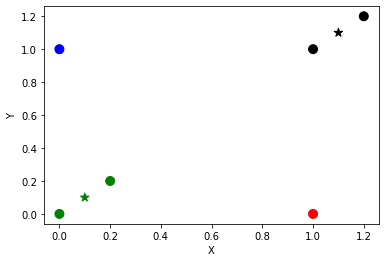

In [7]:
# First we look determine the cluster centers of k-Means by drawing the values in 2 dim coordinate system
plt.scatter(C_new.T[0], C_new.T[1], color=['g', 'b', 'r', 'black'], marker = '*', s=80)
plt.scatter(X.T[0], X.T[1], color=['g', 'b', 'r', 'black', 'black', 'g'], marker = 'o', s=80)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [118]:
# RBF network with K-means
w = np.ones(C_new.shape[0] + 1) # BIAS INCLUDED

eta = 1 # learning rate

epochs = 4 # number of epochs

RBF_centers = []

for i in range(0, len(X)):
    RBF_centers_i = []

    for j in range(0, len(C_new)):
        RBF_centers_i.append(np.exp(- (np.linalg.norm(X[i] - C_new[j]))**2 / (2*sigma**2)))

    RBF_centers.append(RBF_centers_i)

RBF_centers = np.array(RBF_centers)

RBF_centers = np.insert(RBF_centers, 0, 1, axis=1) # INCLUDE BIAS

print(f'Parameters of the RBF network (including BIAS):')
print(RBF_centers)
print('\n')

for epoch in range(0, epochs):
    print(f"{epoch+1}° epoch:")
    for i in range(0, len(X)):
        net = RBF_centers[i].dot(w)
        #net = 1 / (1 + np.exp(-net))
        print(f'Net for x_{i+1} is: {net}')
        net = np.sign(net)
        
        delta_w = eta * (t[i] - net) * RBF_centers[i]
        w = w + delta_w
        print(w)
    print('\n')

Parameters of the RBF network (including BIAS):
[[1.         0.60653066 0.36787944]
 [1.         0.60653066 0.00673795]
 [1.         0.082085   1.        ]]


1° epoch:
Net for x_1 is: 1.9744101008840755
[1. 1. 1.]
Net for x_2 is: 1.6132686067117188
[1. 1. 1.]
Net for x_3 is: 2.0820849986238987
[-1.       0.83583 -1.     ]


2° epoch:
Net for x_1 is: -0.8609229181945366
[ 1.          2.04889132 -0.26424112]
Net for x_2 is: 2.2409349626740376
[ 1.          2.04889132 -0.26424112]
Net for x_3 is: 0.9039421237043401
[-1.          1.88472132 -2.26424112]


3° epoch:
Net for x_1 is: -0.6898264884570389
[ 1.          3.09778264 -1.52848224]
Net for x_2 is: 2.8686013186363564
[ 1.          3.09778264 -1.52848224]
Net for x_3 is: -0.27420075121521825
[ 1.          3.09778264 -1.52848224]


4° epoch:
Net for x_1 is: 2.316602960359071
[ 1.          3.09778264 -1.52848224]
Net for x_2 is: 2.8686013186363564
[ 1.          3.09778264 -1.52848224]
Net for x_3 is: -0.27420075121521825
[ 1.          3

In [9]:
# Query vector
X_query = np.array([1, 1])
t_query = 1

RBF_centers_query = []

for j in range(0, len(C_new)):
    RBF_centers_query.append(np.exp(- (np.linalg.norm(X_query - C_new[j]))**2 / (2*sigma**2)))

RBF_centers_query = np.array(RBF_centers_query)
    
RBF_centers_query = np.insert(RBF_centers_query, len(RBF_centers_query), 1)

net = RBF_centers_query.dot(w)
net = 1 / (1 + np.exp(-net))
net

0.9210397849996868

# III) PCA

The Karhunen-Loève transform is a linear transform that maps possibly correlated variables into a set of values of linearly
uncorrelated variables. 
The KL transformation rotates the coordinate system so that the covariance matrix is diagonal.
This transformation is defined in such a way that the first principal component has the largest possible variance.

In [59]:
data = np.array([[1, 1], [2, 2], [3, 6]])

In [60]:
cov_matrix = np.cov(data.T
                    #, bias=True
                   ) #### POPULATION COVARIANCE ###########
cov_matrix

array([[1. , 2.5],
       [2.5, 7. ]])

In [65]:
a = - cov_matrix[0][0] - cov_matrix[1][1]
b = cov_matrix[0][0] * cov_matrix[1][1] - (cov_matrix[0][1] * cov_matrix[1][0])
print(f'Characterist equation is: x^2 + {a}x + {b} = 0')

Characterist equation is: x^2 + -8.0x + 0.75 = 0


In [80]:
# Solve the equation for lambda
eigenvalues = np.linalg.eig(cov_matrix)[0]
eigenvectors = np.linalg.eig(cov_matrix)[1]
print(f'The eigenvalues are given by: \n {eigenvalues}')
print(f'The eigenvectors are given by: \n {eigenvectors}') 

The eigenvalues are given by: 
 [0.09487516 7.90512484]
The eigenvectors are given by: 
 [[-0.94027158 -0.34042526]
 [ 0.34042526 -0.94027158]]


In [85]:
((np.identity(len(data[0])) * eigenvalues[0]) - cov_matrix)[0][1]

-2.5

In [86]:
((np.identity(len(data[0])) * eigenvalues[1]) - cov_matrix)[1][1]

0.905124837953327

In [92]:
eig = [1]
eig.append(((np.identity(len(data[0])) * eigenvalues[0]) - cov_matrix[0][1])[0][1] / -((np.identity(len(data[0])) * eigenvalues[0]) - cov_matrix[1][1])[1][1])
print(f'The eigenvector is: {eig}')

The eigenvector is: [1, -0.3620499351813309]


In [93]:
eig = [1]
eig.append(((np.identity(len(data[0])) * eigenvalues[1]) - cov_matrix[0][1])[0][1] / -((np.identity(len(data[0])) * eigenvalues[1]) - cov_matrix[1][1])[1][1])
print(f'The eigenvector is: {eig}')

The eigenvector is: [1, 2.7620499351813317]


In [97]:
a = np.array([[1, -0.3620499351813309], [1, 2.7620499351813317]])

plane_1 = a[0] / np.linalg.norm(a[0])
plane_2 = a[1] / np.linalg.norm(a[1])

print('The normalized eigenvectors are:')
print(plane_1)
print(plane_2)

The normalized eigenvectors are:
[ 0.94027158 -0.34042526]
[0.34042526 0.94027158]


In [96]:
# Projecting the data into the principal component
dim = np.array([0.34042526, 0.94027158])   # vector v:
  
for point in data:
    proj_of_point_on_dim = np.dot(point, dim)
    print(f"Projection of Vector {point} on Vector v is: ", proj_of_point_on_dim)

Projection of Vector [1 1] on Vector v is:  1.28069684
Projection of Vector [2 2] on Vector v is:  2.56139368
Projection of Vector [3 6] on Vector v is:  6.6629052600000005


# Kmeans

In [31]:
# Data
X = np.array([[1, 0, 0], [8, 8, 4], [3, 3, 0], [0, 0, 1], [0, 1, 0], [3, 2, 1]])

# Number of clusters
K = 2

# Means
mi = np.array([[1, 0, 0], [8, 8, 4]])

# Epochs
epochs = 10

for epoch in range(0, epochs):
    # Step 1: Assign points to clusters
    assignments = []
    for i in range(0, len(X)):
        dist = []
        for j in range(0, K):
            dist.append(np.linalg.norm(X[i] - mi[j])**2)
        assignments.append(np.argmin(dist))

    # Step 2: Compute new clusters
    mi_new = [np.average(X[np.array(assignments) == k], axis=0) for k in range(0, K)]

    # Step 3: Verify convergence
    for a in range(0, K):
        if np.linalg.norm(mi[a] - mi_new[a])**2 > 0.01:
            mi = mi_new
        else:
            break
print(f'The final mean vector is given by: {mi}')

The final mean vector is given by: [array([1.4, 1.2, 0.4]), array([8., 8., 4.])]


# CNN

In [6]:
!pip install h5py==2.9

  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acesso negado: 'C:\\Users\\guilh\\AppData\\Local\\Temp\\pip-uninstall-rz0tstrm\\h5.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
from tensorflow import keras
model = keras.Sequential([
    keras.Input(shape=(28, 28 , 3)),
    
    keras.layers.Conv2D(filters=8, # number of kernels
                        kernel_size=(5, 5), # shape or kernel
                        strides=(1, 1),
                        padding='valid', # 'valid' or 'same' 
                        use_bias=True,
                       name='conv'),
    
    #keras.layers.Conv2D(filters=12, # number of kernels
    #                    kernel_size=(3, 3), # shape or kernel
    #                    strides=(1, 1),
    #                    padding='same', 
    #                    use_bias=True,
    #                   name='conv2'),
    
    keras.layers.MaxPooling2D(pool_size=(4, 4),
                                 strides=(2, 2),
                                 name='pooling'),
    
    keras.layers.Flatten(name='flatten'), # Important to use
    
        keras.layers.Dense(10,
                      activation = 'softmax')  # Important to use for classification
    
])
 
model.summary()
model.output_shape

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv2D)                (None, 24, 24, 8)         608       
_________________________________________________________________
pooling (MaxPooling2D)       (None, 11, 11, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 968)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                9690      
Total params: 10,298
Trainable params: 10,298
Non-trainable params: 0
_________________________________________________________________


(None, 10)

In [34]:
from tensorflow import keras
model = keras.Sequential([
    keras.Input(shape=(28, 28 , 3)),
    
    keras.layers.Flatten(name='flatten'), # Important to use
    
        keras.layers.Dense(100),  
        keras.layers.Dense(10,
                      activation = 'softmax')  # Important to use for classification
    
])
 
model.summary()
model.output_shape

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2352)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               235300    
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1010      
Total params: 236,310
Trainable params: 236,310
Non-trainable params: 0
_________________________________________________________________


(None, 10)

In [10]:
model = keras.Sequential([
    keras.Input(shape=(28, 28 , 1)),
    
    keras.layers.Conv2D(filters=16, # number of kernels
                        kernel_size=(3, 3), # shape or kernel
                        strides=(1, 1),
                        padding='same', # 'valid' or 'same' 
                        use_bias=True,
                       name='conv1'),
    
    keras.layers.Dense(16,
                      activation = 'relu'),  # Important to use for classification
    
    keras.layers.MaxPooling2D(pool_size=(2, 2),
                                 strides=(2, 2),
                                 name='pooling'),
    
    
    keras.layers.Conv2D(filters=32, # number of kernels
                        kernel_size=(3, 3), # shape or kernel
                        strides=(1, 1),
                        padding='valid', 
                        use_bias=True,
                       name='conv2'),
    
    keras.layers.Dense(32,
                      activation = 'relu'),  # Important to use for classification
    
    keras.layers.MaxPooling2D(pool_size=(2, 2),
                                 strides=(2, 2),
                                 name='pooling2'),
    
    keras.layers.Flatten(name='flatten'), # Important to use
    
        keras.layers.Dense(10,
                      activation = 'softmax')  # Important to use for classification
    
])
 
model.summary()
model.output_shape

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 16)        160       
_________________________________________________________________
dense_15 (Dense)             (None, 28, 28, 16)        272       
_________________________________________________________________
pooling (MaxPooling2D)       (None, 14, 14, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 12, 12, 32)        4640      
_________________________________________________________________
dense_16 (Dense)             (None, 12, 12, 32)        1056      
_________________________________________________________________
pooling2 (MaxPooling2D)      (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)             

(None, 10)

# MLP

In [6]:
from tensorflow import keras
model = keras.Sequential([
    keras.Input(shape=(10000, 100)),
    keras.layers.Dense(20,
                       use_bias=True,
                       name='layer1'),
    
    keras.layers.Dense(20,
                       use_bias=True,
                       name='layer2'),
    keras.layers.Dense(1,
                      name='layer3')
])
 
model.summary()
model.output_shape

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10000, 20)         2020      
_________________________________________________________________
layer2 (Dense)               (None, 10000, 20)         420       
_________________________________________________________________
layer3 (Dense)               (None, 10000, 1)          21        
Total params: 2,461
Trainable params: 2,461
Non-trainable params: 0
_________________________________________________________________


(None, 10000, 1)